# Notebook used in order to produce figures for the writing of the report

In [ ]:
# Plot explaining how the K-means algorithm works
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('images/05.11-expectation-maximization.png', dpi=300)

In [ ]:
# Plot ReLU activation function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = np.linspace(-10, 10, 100)
y = np.maximum(x, 0)
sns.set(font_scale=1, style="whitegrid")
plt.plot(x, y, color='#18A558')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Function')
plt.savefig('images/relu.png', dpi=300)


In [31]:
perfs_dict = {'Simple \nAutoEncoder': [0.4394, 1009.7158, 0.7553], 'Deep \nAutoEncoder': [0.6996, 3769.2609, 0.3881], 'Variational \nAutoEncoder': [0.7668, 1712.2035, 0.1969], 'Fine-tuned \nTransformer': [0.5523, 1506.3686, 0.4117]}

Text(0.5, 1.0, 'Davies-Bouldin index for different models')

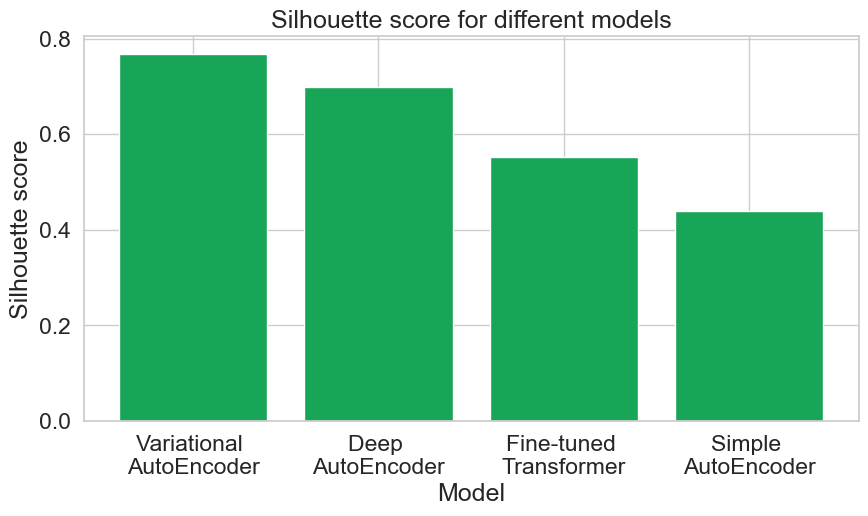

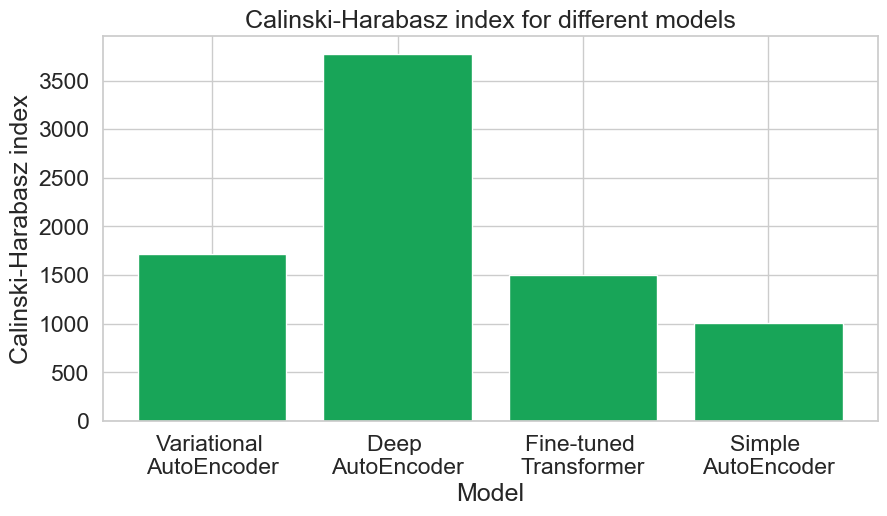

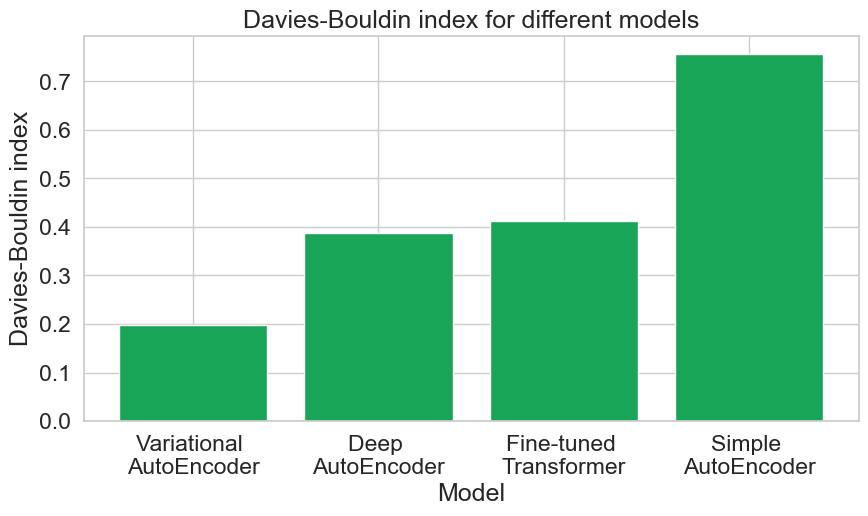

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Plot histogram of performance metrics
df = pd.DataFrame(perfs_dict)
df = df.T
df.columns = ['Silhouette score', 'Calinski-Harabasz index', 'Davies-Bouldin index']
df = df.sort_values(by=['Silhouette score'], ascending=False)
df = df.reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df['index'], df['Silhouette score'], color='#18A558')
ax.set_ylabel('Silhouette score')
ax.set_xlabel('Model')
ax.set_title('Silhouette score for different models')

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df['index'], df['Calinski-Harabasz index'], color='#18A558')
ax.set_ylabel('Calinski-Harabasz index')
ax.set_xlabel('Model')
ax.set_title('Calinski-Harabasz index for different models')

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df['index'], df['Davies-Bouldin index'], color='#18A558')
ax.set_ylabel('Davies-Bouldin index')
ax.set_xlabel('Model')
ax.set_title('Davies-Bouldin index for different models')

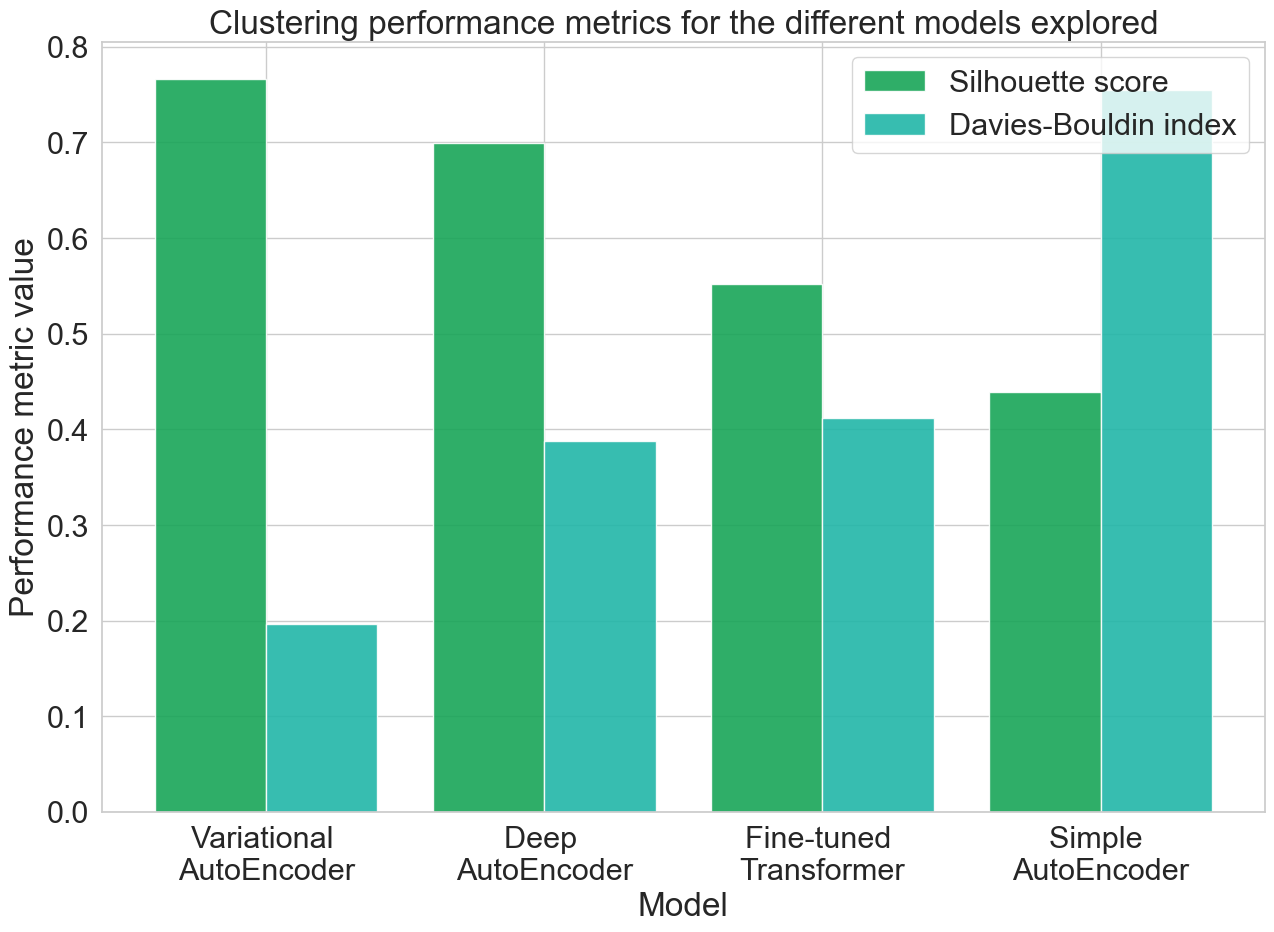

In [38]:
# Plot all performance metrics in one plot as bars 
import seaborn as sns
df = pd.DataFrame(perfs_dict)
df = df.T
df.columns = ['Silhouette score', 'Calinski-Harabasz index', 'Davies-Bouldin index']
df = df.sort_values(by=['Silhouette score'], ascending=False)
df = df.reset_index()

x_axis = np.arange(len(df['index']))
sns.set(font_scale=2, style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(x_axis-0.2, df['Silhouette score'], color='#18A558', label='Silhouette score', width=0.4, alpha=0.9)
# same witdh but shifted on the right
ax.bar(x_axis+0.2, df['Davies-Bouldin index'], color='#21B6A8', label='Davies-Bouldin index', width=0.4, alpha=0.9)
ax.set_ylabel('Performance metric value')
ax.set_xlabel('Model')
ax.set_xticks(x_axis, df['index'])
ax.set_title('Clustering performance metrics for the different models explored')
ax.legend()
plt.savefig('images/performance_metrics.png', dpi=300, bbox_inches='tight')
plt.show()